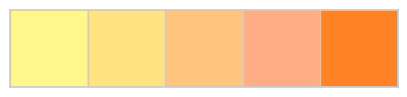

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date, datetime # for manupulating time and date columns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler # For handling categorical column and scaling numeric columns
from sklearn.impute import SimpleImputer ## HAndling Missing Values
# Libraries for clustering and evaluation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.cluster import (
    KMeans, AgglomerativeClustering, DBSCAN, MeanShift,
    SpectralClustering, AffinityPropagation, OPTICS
)
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore") # To prevent kernel from showing any warning

# set the color palette
palette = sns.color_palette(["#FFF78A",'#FFE382','#FFC47E','#FFAD84','#FF8224'])
sns.palplot(palette) # print color palette

In [65]:
data = pd.read_csv("E:\\projects\\internship_project\\notebooks\\data\\cleaned_data.csv")

In [66]:
data.shape

(2190, 7)

In [67]:
data.head()

,Income,Age,relationship,Education_Level,members_home,num_purchases,expenses
0,58138.0,67,single,Graduate,0,25,1269
1,46344.0,70,single,Graduate,2,6,18
2,71613.0,59,in_relationship,Graduate,1,21,602
3,26646.0,40,in_relationship,Graduate,2,8,35
4,58293.0,43,in_relationship,Postgraduate,2,19,334


In [68]:
categorical_cols=data.select_dtypes(include='object').columns

numerical_cols=data.select_dtypes(exclude='object').columns

In [69]:
categorical_cols

Index(['relationship', 'Education_Level'], dtype='object')

In [70]:
data['relationship'].value_counts()

relationship
in_relationship    1415
single              775
Name: count, dtype: int64

In [71]:
numerical_cols

Index(['Income', 'Age', 'members_home', 'num_purchases', 'expenses'], dtype='object')

In [72]:
num_pipeline=Pipeline(
    
    
    steps=[
        
        ('imputer',SimpleImputer()),
        ('scaler', StandardScaler())
    ]
    
    
)

In [73]:
nom_cols = ['relationship']
ord_cols = ['Education_Level']

In [74]:
ordinal_pipeline=Pipeline(
    steps=[
        ('ordinalencoder',OrdinalEncoder(categories=[['Undergraduate','Graduate','Postgraduate']]))
    ] 
)

nominal_pipeline=Pipeline(
    steps=[
        ('onehotencoder',OneHotEncoder(categories=[['in_relationship', 'single']]))
    ] 
)



In [75]:
preprocessor=ColumnTransformer(
    [
        
        ('num_pipeline',num_pipeline,numerical_cols),
        ('ordinal_pipeline',ordinal_pipeline,ord_cols),
        ('nominal_pipeline',nominal_pipeline,nom_cols)
    ]
)

In [76]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Income', 'Age', 'members_home', 'num_purchases', 'expenses'], dtype='object')),
                                ('ordinal_pipeline',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Undergraduate',
                                                                              'Graduate',
                                                                              'Postgraduate']]))]),
                                 ['Education_Level']),
                                ('nominal_pipeline',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(categories=[['in_relationship',
                                                                             'single']]))]),
                                 ['relationship'])])

In [77]:
data.shape

(2190, 7)

In [78]:
# Now lets fit and transform the data
preprocessed_data= preprocessor.fit_transform(data)

In [79]:
preprocessed_data[0]

array([ 0.31920779,  1.04631104, -1.77276811,  1.33284025,  1.49312876,
        1.        ,  0.        ,  1.        ])

In [80]:
preprocessed_data.shape

(2190, 8)

## K-Means clustering 

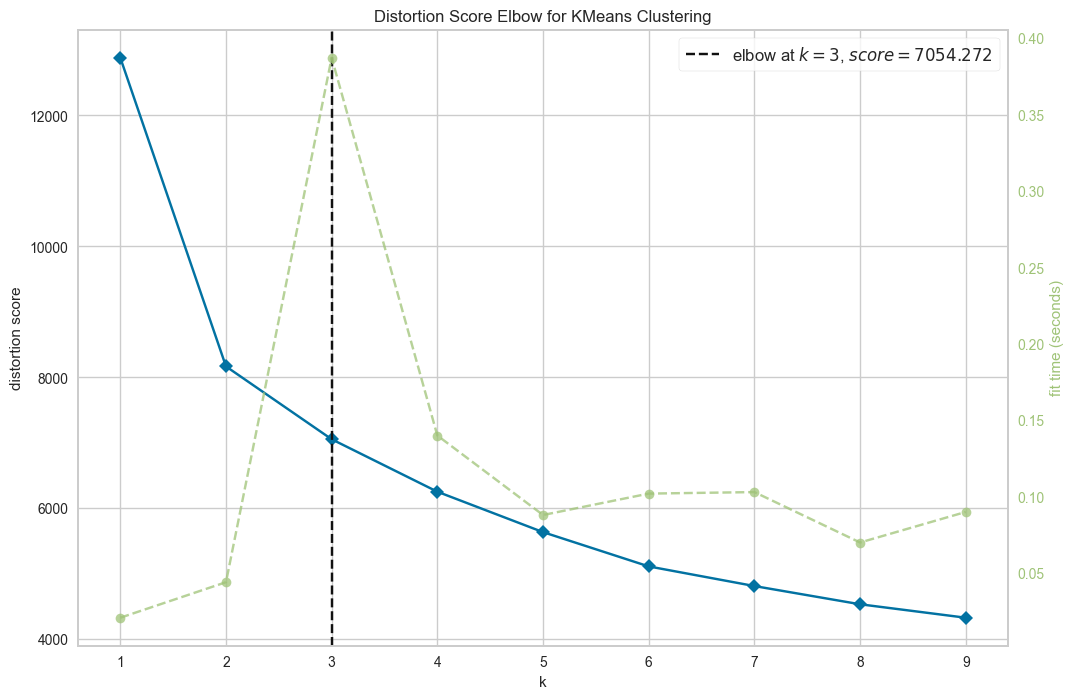

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [81]:
from yellowbrick.cluster import KElbowVisualizer

plt.figure(figsize=(12, 8))
elbow_graph = KElbowVisualizer(KMeans(random_state=43), k=(1,10))
elbow_graph.fit(preprocessed_data)
elbow_graph.show()

In [82]:
# using k-means to form clusters
kmeans = KMeans(n_clusters=3, random_state=42)
 #fit the data and adding back clusters to the data in clusters column

In [83]:
from sklearn.metrics import silhouette_score
kmeans_labels = kmeans.fit_predict(preprocessed_data)
kmeans_score = silhouette_score(preprocessed_data, kmeans_labels)
print(kmeans_score)

0.22811000992901817


In [85]:
## with PCA

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(preprocessed_data)
PCA_ds = pd.DataFrame(pca.transform(preprocessed_data))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
0,2190.0,-2.920039e-17,1.648333e+00,-2.939650e+00,-1.548959e+00,-1.969272e-01,1.456981e+00,4.465909e+00
1,2190.0,-5.191180e-17,1.103421e+00,-3.187921e+00,-7.243777e-01,8.989467e-03,8.124450e-01,3.494716e+00
2,2190.0,8.760116e-17,9.210591e-01,-2.289988e+00,-6.919151e-01,-6.049570e-02,6.204181e-01,3.105168e+00
3,2190.0,3.568936e-17,6.363834e-01,-1.422580e+00,-5.678704e-01,5.451451e-02,3.910872e-01,1.861715e+00
4,2190.0,-1.216683e-17,5.623274e-01,-1.753741e+00,-3.854661e-01,-4.358785e-02,3.526217e-01,2.902906e+00
5,2190.0,1.338351e-17,4.781988e-01,-1.979551e+00,-3.063849e-01,1.682083e-02,3.286473e-01,2.664593e+00
6,2190.0,5.353404e-17,3.888463e-01,-1.721761e+00,-2.271368e-01,2.550054e-02,2.322282e-01,2.452664e+00
7,2190.0,4.239589e-19,4.260259e-15,-1.366858e-14,-2.830024e-15,1.537006e-16,3.040281e-15,1.047877e-14


In [86]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.46176401, 0.6686889 , 0.81286899, 0.88169743, 0.9354388 ,
       0.97430278, 1.        , 1.        ])

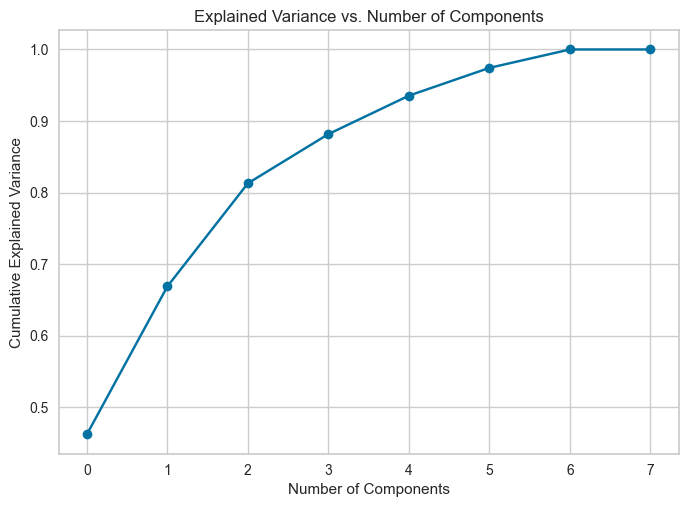

In [87]:
# Plot cumulative explained variance
plt.plot(cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [88]:
pca = PCA(n_components=5)
pca.fit(preprocessed_data)
PCA_ds = pd.DataFrame(pca.transform(preprocessed_data))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
0,2190.0,6.164526e-17,1.648333,-2.939650,-1.548959,-0.196927,1.456981,4.465909
1,2190.0,-3.893385e-17,1.103421,-3.187921,-0.724378,0.008989,0.812445,3.494716
2,2190.0,4.542282e-17,0.921059,-2.289988,-0.691915,-0.060496,0.620418,3.105168
3,2190.0,3.893385e-17,0.636383,-1.422580,-0.567870,0.054515,0.391087,1.861715
4,2190.0,-2.027805e-17,0.562327,-1.753741,-0.385466,-0.043588,0.352622,2.902906


In [89]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.46176401, 0.6686889 , 0.81286899, 0.88169743, 0.9354388 ])

In [90]:
PCA_ds.head()

,0,1,2,3,4
0,2.406933,-0.724114,1.331814,0.598092,0.489703
1,-1.163962,0.564092,1.553930,0.227001,-0.206385
2,1.268987,0.110772,0.011217,0.440267,-0.241196
3,-1.985011,-0.581863,-0.917666,0.010824,-0.057911
4,0.027957,0.071030,-1.201700,-0.742815,0.403741


Elbow Method to determine the number of clusters to be formed:


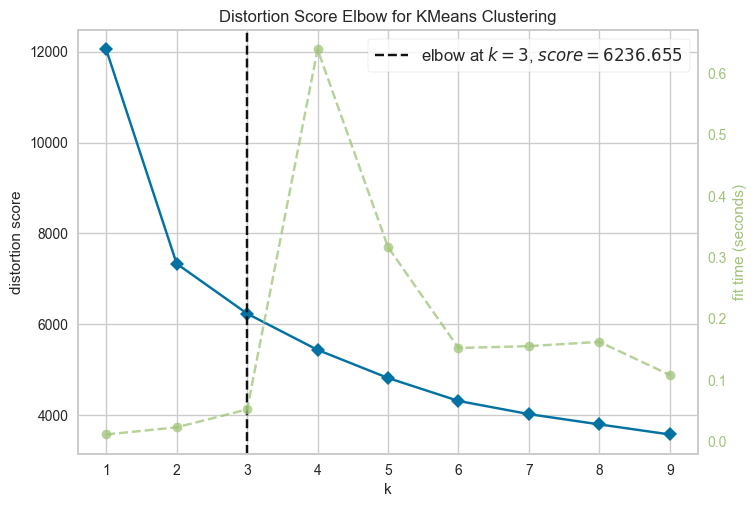

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [94]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=(1,10))
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [96]:
# Note: K-Means is a popular centroid-based clustering algorithm.
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(PCA_ds)
kmeans_score = silhouette_score(PCA_ds, kmeans_labels)

# Note: Agglomerative Clustering is a hierarchical clustering algorithm using Ward linkage.
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglomerative_labels = agglomerative.fit_predict(PCA_ds)
agglomerative_score = silhouette_score(PCA_ds, agglomerative_labels)

# Note: DBSCAN is a density-based clustering algorithm.
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(PCA_ds)
dbscan_score = silhouette_score(PCA_ds, dbscan_labels)

# Note: GMM is a probabilistic model-based clustering algorithm.
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(PCA_ds)
gmm_score = silhouette_score(PCA_ds, gmm_labels)




In [97]:
print("K-Means Silhouette Score:", kmeans_score)
print("Agglomerative Silhouette Score:", agglomerative_score)
print("DBSCAN Silhouette Score:", dbscan_score)
print("GMM Silhouette Score:", gmm_score)

K-Means Silhouette Score: 0.24816788607169618
Agglomerative Silhouette Score: 0.21990290464972145
DBSCAN Silhouette Score: -0.19784582428389452
GMM Silhouette Score: 0.2375867577364672


In [98]:
## choosing kmeans clustering with PCA as the final model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(PCA_ds)
data['Clusters'] = kmeans.fit_predict(PCA_ds)
kmeans_score = silhouette_score(PCA_ds, kmeans_labels)
print(kmeans_score)

0.24816788607169618


In [99]:
data['Clusters'].value_counts()

Clusters
0    851
2    709
1    630
Name: count, dtype: int64

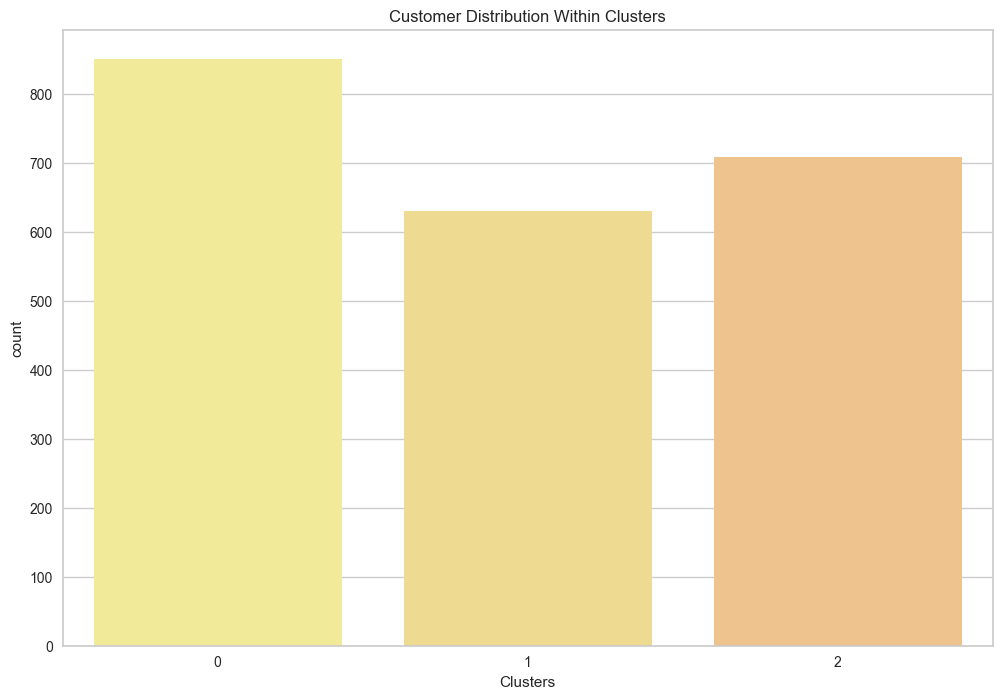

In [100]:
# count plot to see number of customers in each cluster
plt.figure(figsize=(12, 8))
sns.countplot(x='Clusters', data=data, palette=palette)
plt.title('Customer Distribution Within Clusters')
plt.show()

### observations
 cluster 0 has highest number of customers
 

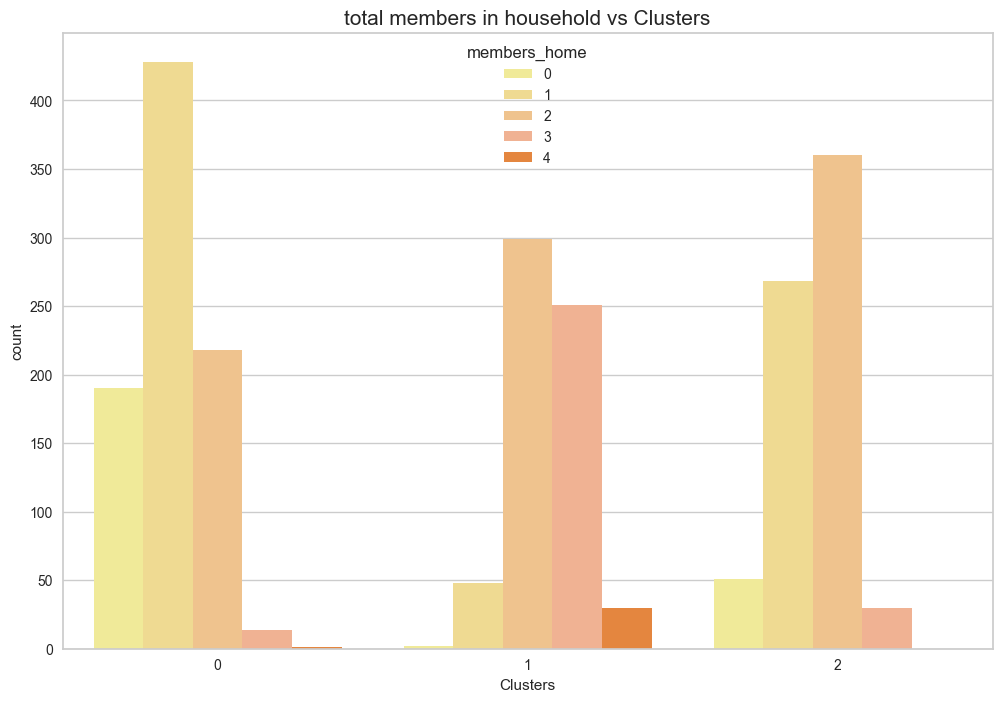

In [101]:
# Find out the customers which have kids in different clusters
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x="Clusters", hue="members_home",palette=palette)
plt.title("total members in household vs Clusters", size=15)
plt.show()

### observation

cluster 0 has the maximum number of household members

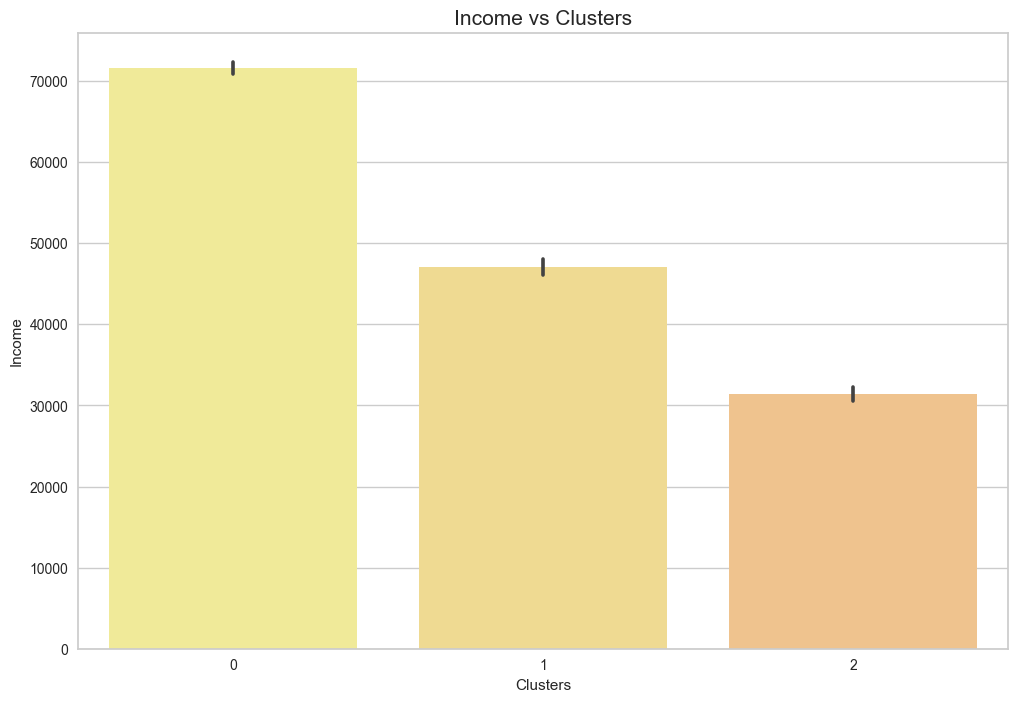

In [102]:
# Lets findout income of customers with in clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=data["Clusters"], y=data["Income"],palette=palette)
plt.title("Income vs Clusters", size=15)
plt.show()

### OBSERVATIONS

clusters 0 and 1 have the most income generating customers
-- cluster 2 has less income generating individuals

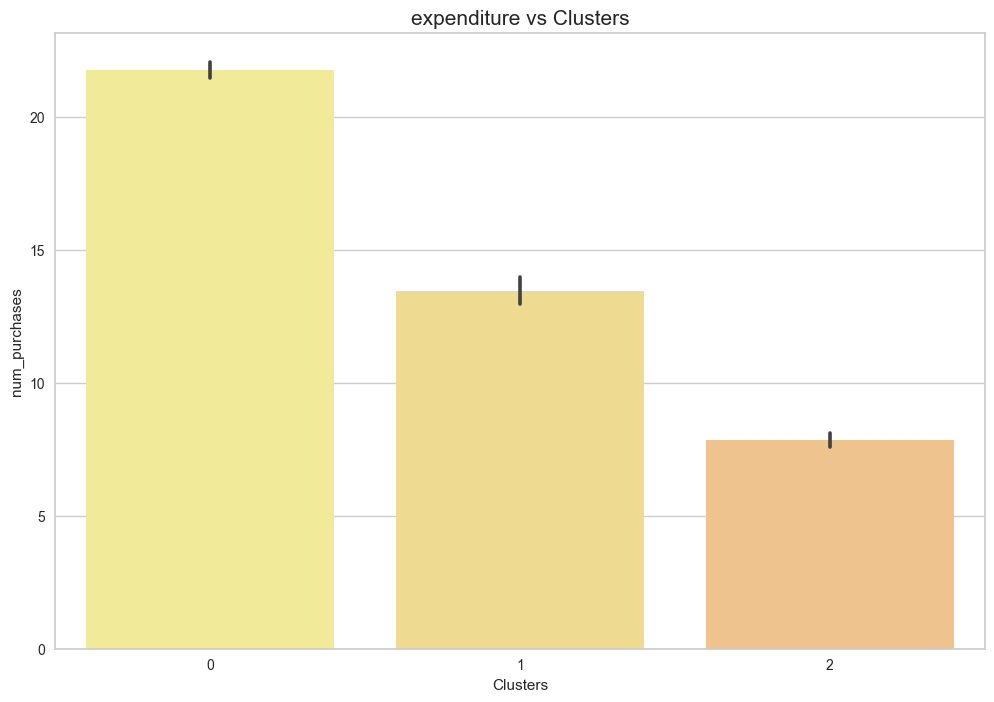

In [103]:
# Lets findout expenditure of customers with in clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=data["Clusters"], y=data["num_purchases"],palette=palette)
plt.title("expenditure vs Clusters", size=15)
plt.show()

-- clusters 0 have the most purchases done

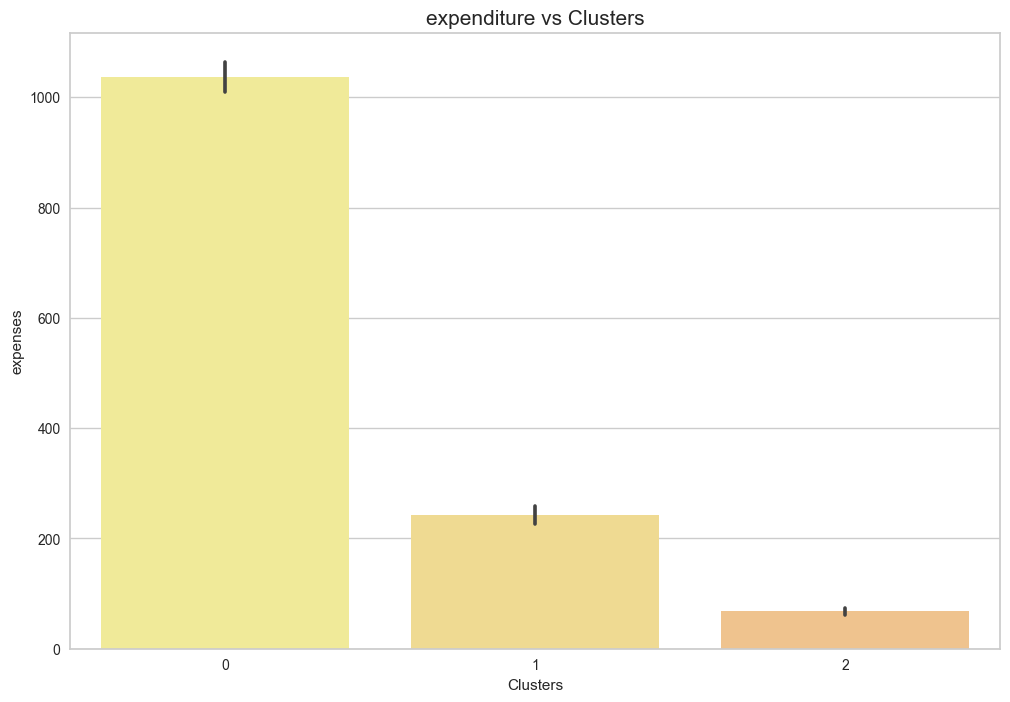

In [104]:
# Lets findout expenditure of customers with in clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=data["Clusters"], y=data["expenses"],palette=palette)
plt.title("expenditure vs Clusters", size=15)
plt.show()

clustor 0 has most expenditure

<Axes: xlabel='Clusters', ylabel='count'>

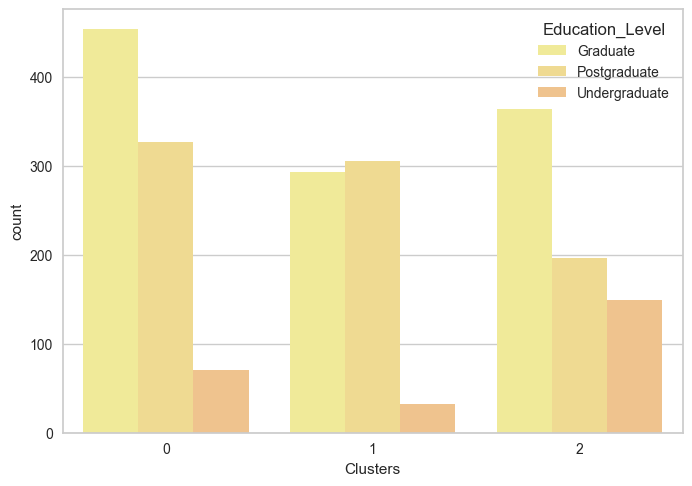

In [105]:
sns.countplot(data=data, x="Clusters", hue="Education_Level",palette=palette)

-- cluster 0 has the most number of graduates , post graduates and undergraduates . 
at  the same time income of cluster 0 is also compared to other 2 clusters.

<Axes: xlabel='Clusters', ylabel='count'>

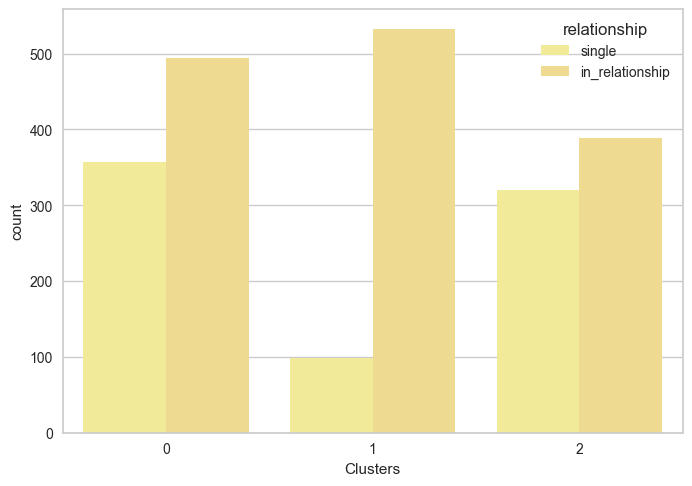

In [106]:
sns.countplot(data=data, x="Clusters", hue="relationship",palette=palette)

<Axes: xlabel='Clusters', ylabel='count'>

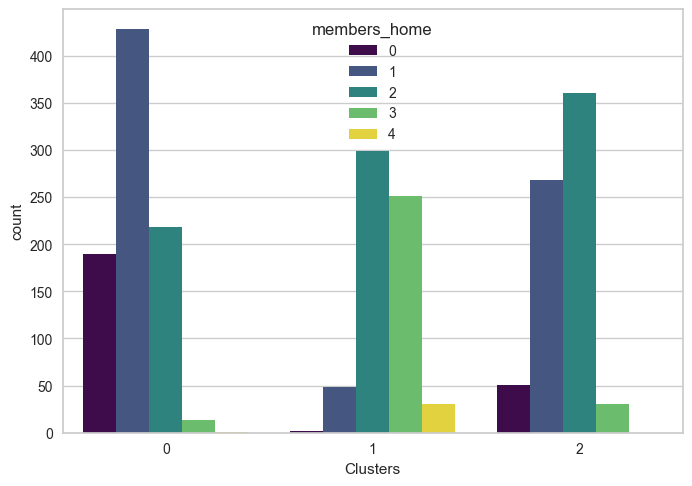

In [108]:
sns.countplot(data=data, x="Clusters", hue="members_home",palette='viridis')

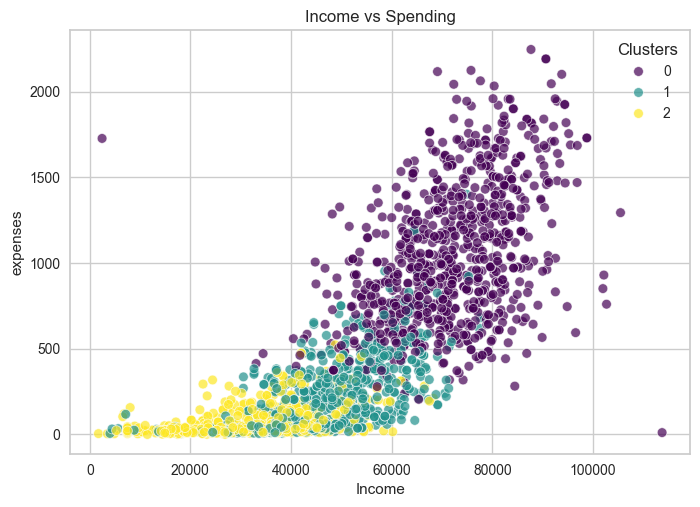

In [109]:
sns.scatterplot(
    data=data,
    x="Income",
    y="expenses",
    hue="Clusters",
    palette="viridis",
    alpha=0.7,
)
plt.title("Income vs Spending")
plt.show()

## Customer Profiling

### Cluster 0 
1. maximum number of customers with highest income
2. Graduates and post graduates
3. almost equal number of singles and in relationship people
4. no kids, only few have 1 kid
5. their spending is also high


### Cluster 1
1. Average number of customers with middle income
2. equal number of graduates and post graduates
3. most of them are in relationship
4. have 1 or 2 kids
5. their spending is the less

### Cluster 2
1. less number of customers with low income
2. almost equal number of graduates and postgraduates
3. most of them are in relationship. few are singles
4. have 0 or 1 kids
5. their spending is lowest 

In [110]:
data.columns

Index(['Income', 'Age', 'relationship', 'Education_Level', 'members_home',
       'num_purchases', 'expenses', 'Clusters'],
      dtype='object')

In [62]:
data.sample()

,Income,Response,Age,relationship,Education_Level,members_home,AcceptedCmp,num_purchases,expenses,Clusters
1225,62972.0,1,69,in_relationship,Undergraduate,2,0,16,375,0


-- cluster 2 has most individuals who are in relationship as well as singles

In [51]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [91]:
# separate features and target column
X = data.drop('Clusters', axis=1)
y = data['Clusters']

In [92]:
X.shape

(2216, 9)

In [93]:
# create train and test data
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [94]:
x_train.shape

(1551, 9)

In [95]:
x_train= preprocessor.fit_transform(x_train)
x_test= preprocessor.transform(x_test)

In [96]:

classfiier =  GradientBoostingClassifier(n_estimators=100,learning_rate=0.1).fit(x_train,y_train)

In [105]:
y_predict = classfiier.predict(x_test)

In [97]:
classfiier.score(x_test,y_test)

0.9774436090225563

In [98]:
import pickle

filename = 'classifier.pkl' # create a variable with name you wanna give to the file
pickle.dump(classfiier, open(filename,'wb')) 

In [85]:
data['expenses'].min()

0

In [103]:
# importing necessary libraries
import pickle
import streamlit as st
import pandas as pd
import numpy as np

#load the model
classifier = pickle.load(open('classifier.pkl','rb'))

classifier.n_features_in_



    

10

In [106]:
filename1 = 'processor.pkl' # create a variable with name you wanna give to the file
pickle.dump(preprocessor, open(filename1,'wb')) 

In [44]:
data[numerical_cols].corr()

,Income,Response,Age,members_home,AcceptedCmp,num_purchases,expenses
Income,1.000000,0.133047,0.161791,-0.240148,0.179759,0.566873,0.658654
Response,0.133047,1.000000,-0.023692,-0.217987,0.387126,0.154237,0.270928
Age,0.161791,-0.023692,1.000000,0.071207,-0.031711,0.170055,0.118995
members_home,-0.240148,-0.217987,0.071207,1.000000,-0.144053,-0.203621,-0.402534
AcceptedCmp,0.179759,0.387126,-0.031711,-0.144053,1.000000,0.165206,0.298739
num_purchases,0.566873,0.154237,0.170055,-0.203621,0.165206,1.000000,0.739371
expenses,0.658654,0.270928,0.118995,-0.402534,0.298739,0.739371,1.000000


In [28]:
target = data['Clusters']

In [29]:
target

0       0
1       1
2       2
3       1
4       2
       ..
2211    2
2212    2
2213    2
2214    2
2215    1
Name: Clusters, Length: 2216, dtype: int32

In [30]:
preprocessed_data

array([[ 0.2340627 ,  2.37795178,  0.98644293, ...,  1.        ,
         0.        ,  1.        ],
       [-0.23455948, -0.42052997,  1.23680074, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.76947764, -0.42052997,  0.31882209, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 0.18809052, -0.42052997, -1.01641959, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.67538765, -0.42052997,  1.06989553, ...,  2.        ,
         1.        ,  0.        ],
       [ 0.02470453,  2.37795178,  1.23680074, ...,  2.        ,
         1.        ,  0.        ]])

In [31]:
 data_array = np.c_[preprocessed_data, np.array(target)]

In [44]:
preprocessed_data.shape

(2216, 10)

In [84]:
data_array.shape

(2216, 11)

In [33]:
X,y = (data_array[:,:-1],data_array[:,-1])

In [43]:
X.shape

(2216, 10)

In [39]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [40]:
x_train.shape

(1662, 10)

In [41]:
y_train.shape

(1662,)

In [42]:
x_test.shape

(554, 10)

In [74]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
classfiier =  GradientBoostingClassifier(n_estimators=100,learning_rate=0.1).fit(x_train,y_train)

In [76]:
y_predict = classfiier.predict(x_test)

In [82]:
classfiier.score(x_test,y_test)

0.98014440433213

In [83]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict)

0.98014440433213

In [ ]:
data.columns